In [1]:
# Imports
import pickle
import time
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzs as anz
from src import mitigation as mit

In [8]:
with open("data/H2O_hamiltonian.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

In [6]:
# Hamiltonians
with open(f"data/H2_hamiltonian.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

In [9]:
num_qubits = hamiltonian.num_qubits
res_normal = {"times":[], "iters": [], "energies": []}
res_all_layers = {"times":[], "iters": [], "energies": []}
res_all_layers_rev = {"times":[], "iters": [], "energies": []}
res_some_layers = {"times":[], "iters": [], "energies": []}
res_some_layers_rev = {"times":[], "iters": [], "energies": []}
for i in range(1,11):
    num_layers=i
    #cf.expand_observable(hamiltonian, num_qubits)
    ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)
    t0 = time.time()
    optimization_normal=mit.VQE_minimization(ansatz, hamiltonian)
    t1 = time.time()
    res_normal["times"].append(t1-t0)
    res_normal["iters"].append(optimization_normal["iters"])
    res_normal["energies"].append(optimization_normal["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers)
    t1 = time.time()
    res_all_layers["times"].append(t1-t0)
    res_all_layers["iters"].append(optimization_all_layers["iters"])
    res_all_layers["energies"].append(optimization_all_layers["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers, "backward")
    t1 = time.time()
    res_all_layers_rev["times"].append(t1-t0)
    res_all_layers_rev["iters"].append(optimization_all_layers_rev["iters"])
    res_all_layers_rev["energies"].append(optimization_all_layers_rev["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1)
    t1 = time.time()
    res_some_layers["times"].append(t1-t0)
    res_some_layers["iters"].append(optimization_some_layers["iters"])
    res_some_layers["energies"].append(optimization_some_layers["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1, "backward")
    t1 = time.time()
    res_some_layers_rev["times"].append(t1-t0)
    res_some_layers_rev["iters"].append(optimization_some_layers_rev["iters"])
    res_some_layers_rev["energies"].append(optimization_some_layers_rev["cost_history"][-1])

KeyboardInterrupt: 

[]

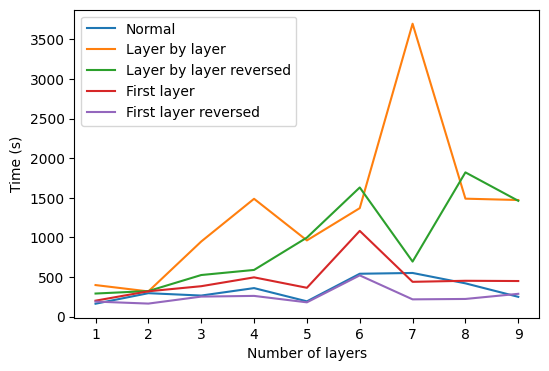

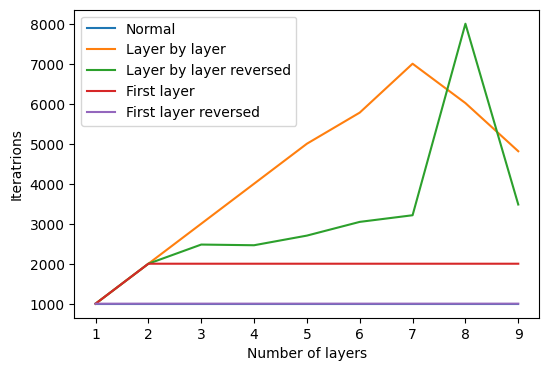

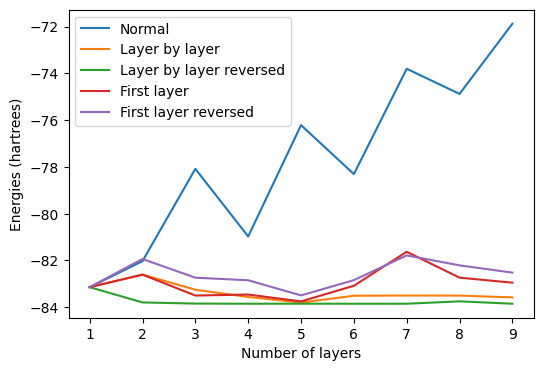

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["times"], label='Normal')
plt.plot(range(1,11), res_all_layers["times"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["times"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["times"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["times"], label='First layer reversed')
plt.xlabel('Number of layers')
plt.ylabel('Time (s)')
plt.legend()
plt.plot()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["iters"], label='Normal')
plt.plot(range(1,11), res_all_layers["iters"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["iters"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["iters"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["iters"], label='First layer reversed')
plt.xlabel('Number of layers')
plt.ylabel('Iteratrions')
plt.legend()
plt.plot()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["energies"], label='Normal')
plt.plot(range(1,11), res_all_layers["energies"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["energies"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["energies"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["energies"], label='First layer reversed')
plt.xlabel('Number of layers')
plt.ylabel('Energies (hartrees)')
plt.legend()
plt.plot()